
# 국가(대륙)별/상품군별 온라인쇼핑 해외직접판매액 살펴보기


* 해외 직접판매를 한다면 어느 국가로 판매전략을 세우면 좋을까?
* './data/국가_대륙_별_상품군별_온라인쇼핑_해외직접판매액.csv' 파일을 읽어와서 살펴본다.
* e : 추정치, p : 잠정치, - : 자료없음, ... : 미상자료, x : 비밀보호, ▽ : 시계열 불연 ( 단위 : 백만원 )

## 필요 라이브러리 가져오기

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## 시각화를 위한 폰트 설정

In [2]:
# Window 의 한글 폰트 설정

plt.rc('font', family = 'Malgun Gothic')
# Mac 의 한글 폰트 설정
#plt.rc('font', family='AppleGothic') 

# x,y축의 -부호처리
plt.rc('axes', unicode_minus=False)

## 데이터 로드하기

In [3]:
# 데이터파일을 로드해서 df_raw라는 변수에 대입, encoding="cp949로 불러오기

df_raw = pd.read_csv('./data/국가_대륙_별_상품군별_온라인쇼핑_해외직접판매액.csv', encoding="cp949")

In [4]:
# 앞 10개의 데이터 보기

df_raw.head(10)

,국가(대륙)별,상품군별,판매유형별,2014 1/4,2014 2/4,2014 3/4,2014 4/4,2015 1/4,2015 2/4,2015 3/4,...,2018 3/4,2018 4/4,2019 1/4,2019 2/4,2019 3/4,2019 4/4,2020 1/4,2020 2/4,2020 3/4,2020 4/4 p)
0,합계,합계,계,148272,153641,163999,213216,269101,271784,268421,...,921586,974060,1250236,1344404,1525396,1879499,1525487,1277716,1621245,1536884
1,합계,합계,면세점,-,-,-,-,-,-,-,...,761836,770656,1070693,1157158,1336372,1655635,1297490,1051987,1410967,1247495
2,합계,합계,면세점 이외,-,-,-,-,-,-,-,...,159750,203404,179543,187246,189024,223864,227997,225729,210278,289389
3,합계,컴퓨터 및 주변기기,계,4915,4052,3912,3529,2903,2697,3804,...,4320,4511,3702,4038,3670,3826,4142,3812,7777,3591
4,합계,컴퓨터 및 주변기기,면세점,-,-,-,-,-,-,-,...,1,215,2,0,1,70,113,0,3497,0
5,합계,컴퓨터 및 주변기기,면세점 이외,-,-,-,-,-,-,-,...,4319,4296,3700,4038,3669,3756,4029,3812,4280,3591
6,합계,가전·전자·통신기기,계,13259,13824,13560,14200,13399,13587,12857,...,27358,18073,21429,22798,25419,24131,12866,14052,14958,13103
7,합계,가전·전자·통신기기,면세점,-,-,-,-,-,-,-,...,20481,11104,14072,15843,17370,15478,4999,5108,4777,5538
8,합계,가전·전자·통신기기,면세점 이외,-,-,-,-,-,-,-,...,6877,6969,7357,6955,8049,8653,7867,8944,10181,7565
9,합계,소프트웨어,계,361,330,372,595,807,484,591,...,313,408,150,228,144,387,183,227,179,375


In [5]:
# 마지막 10개의 데이터 보기

df_raw.tail(10)

,국가(대륙)별,상품군별,판매유형별,2014 1/4,2014 2/4,2014 3/4,2014 4/4,2015 1/4,2015 2/4,2015 3/4,...,2018 3/4,2018 4/4,2019 1/4,2019 2/4,2019 3/4,2019 4/4,2020 1/4,2020 2/4,2020 3/4,2020 4/4 p)
440,기타,음·식료품,면세점 이외,-,-,-,-,-,-,-,...,52,84,251,249,125,177,1370,117,34,75
441,기타,농축수산물,계,980,1019,702,819,673,833,790,...,0,0,0,0,0,2,2,3,1,3
442,기타,농축수산물,면세점,-,-,-,-,-,-,-,...,0,0,0,0,0,0,0,0,0,0
443,기타,농축수산물,면세점 이외,-,-,-,-,-,-,-,...,0,0,0,0,0,2,2,3,1,3
444,기타,생활용품 및 자동차용품,계,1265,1171,1096,877,741,817,738,...,504,589,465,488,308,531,384,334,353,391
445,기타,생활용품 및 자동차용품,면세점,-,-,-,-,-,-,-,...,0,0,0,0,0,0,0,0,0,0
446,기타,생활용품 및 자동차용품,면세점 이외,-,-,-,-,-,-,-,...,504,589,465,488,308,531,384,334,353,391
447,기타,기 타,계,765,735,849,804,788,805,724,...,1120,770,711,689,469,1094,939,710,826,870
448,기타,기 타,면세점,-,-,-,-,-,-,-,...,404,0,0,1,0,1,0,0,0,0
449,기타,기 타,면세점 이외,-,-,-,-,-,-,-,...,716,770,711,688,469,1093,939,710,826,870


In [6]:
# 샘플데이터10개 보기

df_raw.sample(10)

,국가(대륙)별,상품군별,판매유형별,2014 1/4,2014 2/4,2014 3/4,2014 4/4,2015 1/4,2015 2/4,2015 3/4,...,2018 3/4,2018 4/4,2019 1/4,2019 2/4,2019 3/4,2019 4/4,2020 1/4,2020 2/4,2020 3/4,2020 4/4 p)
152,일본,사무·문구,면세점 이외,-,-,-,-,-,-,-,...,523,223,729,735,855,375,349,314,427,439
385,대양주,스포츠·레저용품,면세점,-,-,-,-,-,-,-,...,0,0,0,0,0,0,0,0,0,0
372,대양주,서 적,계,18,17,25,20,20,21,30,...,106,81,62,81,48,81,73,92,111,75
18,합계,음반·비디오·악기,계,5427,5485,6135,5259,5228,7851,6636,...,15905,21945,15193,23557,23784,26899,32898,45273,53668,75838
234,유럽연합(EU),소프트웨어,계,48,34,25,35,40,20,20,...,45,97,28,26,12,28,26,25,22,24
118,중국,화장품,면세점,-,-,-,-,-,-,-,...,627562,666806,945335,1003787,1179409,1508665,1223041,1033022,1382977,1217460
0,합계,합계,계,148272,153641,163999,213216,269101,271784,268421,...,921586,974060,1250236,1344404,1525396,1879499,1525487,1277716,1621245,1536884
257,유럽연합(EU),아동·유아용품,면세점 이외,-,-,-,-,-,-,-,...,287,374,329,312,195,417,367,316,284,387
36,합계,농축수산물,계,3464,3485,3526,5222,5299,4882,5242,...,40,56,25,39,22,40,32,40,41,37
402,대양주,기 타,계,197,269,284,241,208,226,218,...,216,205,210,207,114,142,270,195,247,210


In [7]:
# 행, 열

df_raw.shape

(450, 31)

In [8]:
# 컬럼명

df_raw.columns

Index(['국가(대륙)별', '상품군별', '판매유형별', '2014 1/4', '2014 2/4', '2014 3/4',
       '2014 4/4', '2015 1/4', '2015 2/4', '2015 3/4', '2015 4/4', '2016 1/4',
       '2016 2/4', '2016 3/4', '2016 4/4', '2017 1/4', '2017 2/4', '2017 3/4',
       '2017 4/4', '2018 1/4', '2018 2/4', '2018 3/4', '2018 4/4', '2019 1/4',
       '2019 2/4', '2019 3/4', '2019 4/4', '2020 1/4', '2020 2/4', '2020 3/4',
       '2020 4/4 p)'],
      dtype='object')

In [9]:
# 요약정보

df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   국가(대륙)별      450 non-null    object
 1   상품군별         450 non-null    object
 2   판매유형별        450 non-null    object
 3   2014 1/4     450 non-null    object
 4   2014 2/4     450 non-null    object
 5   2014 3/4     450 non-null    object
 6   2014 4/4     450 non-null    object
 7   2015 1/4     450 non-null    object
 8   2015 2/4     450 non-null    object
 9   2015 3/4     450 non-null    object
 10  2015 4/4     450 non-null    object
 11  2016 1/4     450 non-null    object
 12  2016 2/4     450 non-null    object
 13  2016 3/4     450 non-null    object
 14  2016 4/4     450 non-null    object
 15  2017 1/4     450 non-null    int64 
 16  2017 2/4     450 non-null    int64 
 17  2017 3/4     450 non-null    int64 
 18  2017 4/4     450 non-null    int64 
 19  2018 1/4     450 non-null    

In [10]:
# 국가(대륙)별 컬럼의 고유값과 개수 확인하기

df_raw['국가(대륙)별'].value_counts()

합계            45
미국            45
중국            45
일본            45
아세안(ASEAN)    45
유럽연합(EU)      45
중동            45
중남미           45
대양주           45
기타            45
Name: 국가(대륙)별, dtype: int64

In [11]:
# 상품군별 컬럼의 고유값과 개수 확인하기

df_raw['상품군별'].value_counts()

합계              30
컴퓨터 및 주변기기      30
가전·전자·통신기기      30
소프트웨어           30
서 적             30
사무·문구           30
음반·비디오·악기       30
의류 및 패션 관련상품    30
스포츠·레저용품        30
화장품             30
아동·유아용품         30
음·식료품           30
농축수산물           30
생활용품 및 자동차용품    30
기 타             30
Name: 상품군별, dtype: int64

In [12]:
# 판매유형별 컬럼의 고유값과 개수 확인하기

df_raw['판매유형별'].value_counts()

계         150
면세점       150
면세점 이외    150
Name: 판매유형별, dtype: int64

In [13]:
# 중국 데이터만 따로 보기

df_raw.loc[(df_raw['국가(대륙)별'] == '중국')]

,국가(대륙)별,상품군별,판매유형별,2014 1/4,2014 2/4,2014 3/4,2014 4/4,2015 1/4,2015 2/4,2015 3/4,...,2018 3/4,2018 4/4,2019 1/4,2019 2/4,2019 3/4,2019 4/4,2020 1/4,2020 2/4,2020 3/4,2020 4/4 p)
90,중국,합계,계,55066,68938,77525,117223,170201,183801,173699,...,744661,782962,1055895,1140195,1317494,1664465,1327577,1095112,1455680,1347954
91,중국,합계,면세점,-,-,-,-,-,-,-,...,707619,727126,1012118,1092077,1270158,1599893,1253633,1034738,1392952,1229759
92,중국,합계,면세점 이외,-,-,-,-,-,-,-,...,37042,55836,43777,48118,47336,64572,73944,60374,62728,118195
93,중국,컴퓨터 및 주변기기,계,32,34,65,68,80,50,77,...,17,178,31,19,27,104,61,41,3567,57
94,중국,컴퓨터 및 주변기기,면세점,-,-,-,-,-,-,-,...,1,152,2,0,1,70,0,0,3497,0
95,중국,컴퓨터 및 주변기기,면세점 이외,-,-,-,-,-,-,-,...,16,26,29,19,26,34,61,41,70,57
96,중국,가전·전자·통신기기,계,761,1421,1342,1542,2072,2370,2354,...,18970,10639,13657,14507,15180,12404,3096,2123,3249,5203
97,중국,가전·전자·통신기기,면세점,-,-,-,-,-,-,-,...,18740,10349,13347,14160,14778,11952,2653,1723,2933,5041
98,중국,가전·전자·통신기기,면세점 이외,-,-,-,-,-,-,-,...,230,290,310,347,402,452,443,400,316,162
99,중국,소프트웨어,계,126,128,198,255,281,194,205,...,4,13,6,1,0,0,1,2,1,0


## 분석과 시각화를 위한 tidy data 만들기


In [12]:
df_raw.head(1)

,국가(대륙)별,상품군별,판매유형별,2014 1/4,2014 2/4,2014 3/4,2014 4/4,2015 1/4,2015 2/4,2015 3/4,...,2018 3/4,2018 4/4,2019 1/4,2019 2/4,2019 3/4,2019 4/4,2020 1/4,2020 2/4,2020 3/4,2020 4/4 p)
0,합계,합계,계,148272,153641,163999,213216,269101,271784,268421,...,921586,974060,1250236,1344404,1525396,1879499,1525487,1277716,1621245,1536884


In [15]:
# df_raw의 연도분기를 나타내는 모든 열을 melt이용해 정리하기
# 정리된 결과를 df에 대입

df= df_raw.melt(id_vars=['국가(대륙)별', '상품군별', '판매유형별'], var_name='기간', value_name='million')
df

,국가(대륙)별,상품군별,판매유형별,기간,million
0,합계,합계,계,2014 1/4,148272
1,합계,합계,면세점,2014 1/4,-
2,합계,합계,면세점 이외,2014 1/4,-
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-
...,...,...,...,...,...
12595,기타,생활용품 및 자동차용품,면세점,2020 4/4 p),0
12596,기타,생활용품 및 자동차용품,면세점 이외,2020 4/4 p),391
12597,기타,기 타,계,2020 4/4 p),870
12598,기타,기 타,면세점,2020 4/4 p),0


## 데이터 전처리
### 기간에서 연도, 분기를 분리하기

In [14]:
# df의 '기간'열에서 연도분리하기
# 분리된 연도를 새로운 컬럼 '연도'를 생성하고 대입하기

df['연도'] = df['기간'].str.split(' ').str[0]

In [15]:
# df
df

,국가(대륙)별,상품군별,판매유형별,기간,million,연도
0,합계,합계,계,2014 1/4,148272,2014
1,합계,합계,면세점,2014 1/4,-,2014
2,합계,합계,면세점 이외,2014 1/4,-,2014
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915,2014
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-,2014
...,...,...,...,...,...,...
12595,기타,생활용품 및 자동차용품,면세점,2020 4/4 p),0,2020
12596,기타,생활용품 및 자동차용품,면세점 이외,2020 4/4 p),391,2020
12597,기타,기 타,계,2020 4/4 p),870,2020
12598,기타,기 타,면세점,2020 4/4 p),0,2020


In [16]:
# df의 '기간'열에서 분기 분리하기
# 분리된 분기를 새로운 컬럼 '분기'를 생성하고 대입하기

df['분기'] = df['기간'].str.split(' ').str[1].str.split('/').str[0]

In [17]:
# df['분기'] 확인
df['분기']

0        1
1        1
2        1
3        1
4        1
        ..
12595    4
12596    4
12597    4
12598    4
12599    4
Name: 분기, Length: 12600, dtype: object

In [18]:
# '분기'열을 int형으로 변환

df.분기 = df.분기.astype('int64')

In [19]:
# df.head()

df.head()

,국가(대륙)별,상품군별,판매유형별,기간,million,연도,분기
0,합계,합계,계,2014 1/4,148272,2014,1
1,합계,합계,면세점,2014 1/4,-,2014,1
2,합계,합계,면세점 이외,2014 1/4,-,2014,1
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-,2014,1


In [20]:
# df의 요약정보 확인

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12600 entries, 0 to 12599
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   국가(대륙)별  12600 non-null  object
 1   상품군별     12600 non-null  object
 2   판매유형별    12600 non-null  object
 3   기간       12600 non-null  object
 4   million  12600 non-null  object
 5   연도       12600 non-null  object
 6   분기       12600 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 689.2+ KB


### 금액을 수치데이터로 표현하기 위해 데이터 타입 변경하기

In [21]:
# 'million'열의 데이터 타입확인

df['million']

0        148272
1             -
2             -
3          4915
4             -
          ...  
12595         0
12596       391
12597       870
12598         0
12599       870
Name: million, Length: 12600, dtype: object

In [22]:
# 'million'열의 고유데이터 종료 및 개수 확인

df['million'].value_counts()

-         3600
0         1821
1          134
4           89
2           88
          ... 
26552        1
535868       1
526306       1
9562         1
9716         1
Name: million, Length: 3504, dtype: int64

In [23]:
# nan처리를 위해 numpy 임포트 하기

import numpy as np

In [24]:
# 'million'열의 '-'를 NaN으로 변경하고 열의 데이터 타입을 float형으로 변환
# 결과를 'million'열에 대입

df['million'] = df['million'].replace('-', np.nan).astype('float')

In [25]:
# df 확인

df

,국가(대륙)별,상품군별,판매유형별,기간,million,연도,분기
0,합계,합계,계,2014 1/4,148272.0,2014,1
1,합계,합계,면세점,2014 1/4,NaN,2014,1
2,합계,합계,면세점 이외,2014 1/4,NaN,2014,1
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915.0,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,NaN,2014,1
...,...,...,...,...,...,...,...
12595,기타,생활용품 및 자동차용품,면세점,2020 4/4 p),0.0,2020,4
12596,기타,생활용품 및 자동차용품,면세점 이외,2020 4/4 p),391.0,2020,4
12597,기타,기 타,계,2020 4/4 p),870.0,2020,4
12598,기타,기 타,면세점,2020 4/4 p),0.0,2020,4



### 필요없는 데이터 제거하기

In [26]:
# 합계 데이터는 따로 구할 수 있기 때문에 전체 데이터에서 제거
# '국가(대륙)별'이 합계가 아니고, '상품군별'이 '합계'가 아니고 '판매유형별'이 '계'가 아닌 행들만 선택하여
# df에 대입

df= df.loc[(df['국가(대륙)별'] != '합계') & (df['상품군별'] != '합계') & (df['판매유형별'] != '계')]

In [27]:
# '국가(대륙)별' 고유데이터와 개수 확인

df['국가(대륙)별'].value_counts()

미국            784
중국            784
일본            784
아세안(ASEAN)    784
유럽연합(EU)      784
중동            784
중남미           784
대양주           784
기타            784
Name: 국가(대륙)별, dtype: int64

In [28]:
# '상품군별' 고유데이터와 개수 확인

df['상품군별'].value_counts

<bound method IndexOpsMixin.value_counts of 49         컴퓨터 및 주변기기
50         컴퓨터 및 주변기기
52         가전·전자·통신기기
53         가전·전자·통신기기
55              소프트웨어
             ...     
12593           농축수산물
12595    생활용품 및 자동차용품
12596    생활용품 및 자동차용품
12598             기 타
12599             기 타
Name: 상품군별, Length: 7056, dtype: object>

In [29]:
# '판매유형별' 고유데이터와 개수 확인

df['판매유형별'].value_counts

<bound method IndexOpsMixin.value_counts of 49          면세점
50       면세점 이외
52          면세점
53       면세점 이외
55          면세점
          ...  
12593    면세점 이외
12595       면세점
12596    면세점 이외
12598       면세점
12599    면세점 이외
Name: 판매유형별, Length: 7056, dtype: object>

In [30]:
# df의 요약정보

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7056 entries, 49 to 12599
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   국가(대륙)별  7056 non-null   object 
 1   상품군별     7056 non-null   object 
 2   판매유형별    7056 non-null   object 
 3   기간       7056 non-null   object 
 4   million  4032 non-null   float64
 5   연도       7056 non-null   object 
 6   분기       7056 non-null   int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 441.0+ KB


In [31]:
# df이 결측치 수

df.isnull().sum()

국가(대륙)별       0
상품군별          0
판매유형별         0
기간            0
million    3024
연도            0
분기            0
dtype: int64

## 시각화하기


### 연도별로 전체 상품군별, 국가(대륙)별 판매액을 시각화해본다.

In [32]:
# 연도별, 상품군별 판매액 합을 구하는 피벗 테이블 만들기 
# df_year_product

pd.pivot_table(df, index = '연도', columns='상품군별', values='million', aggfunc= 'sum')
df_year_product = df.pivot_table(index = '연도', columns='상품군별', values='million', aggfunc= 'sum')
df_year_product

상품군별,가전·전자·통신기기,기 타,농축수산물,사무·문구,생활용품 및 자동차용품,서 적,소프트웨어,스포츠·레저용품,아동·유아용품,음·식료품,음반·비디오·악기,의류 및 패션 관련상품,컴퓨터 및 주변기기,화장품
연도,,,,,,,,,,,,,,
2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017,75141.0,44235.0,118.0,6115.0,47041.0,21524.0,614.0,16640.0,17819.0,31052.0,34859.0,410938.0,8829.0,2235982.0
2018,99226.0,54329.0,214.0,4341.0,41103.0,28351.0,1344.0,15265.0,19665.0,46052.0,59642.0,528786.0,17921.0,2710284.0
2019,93777.0,61683.0,126.0,5898.0,48706.0,24272.0,909.0,18490.0,19109.0,39711.0,89433.0,564606.0,15236.0,5017579.0
2020,54979.0,93794.0,150.0,5796.0,35532.0,27108.0,964.0,19951.0,17496.0,23568.0,207677.0,381734.0,19322.0,5073261.0


<AxesSubplot:xlabel='연도'>

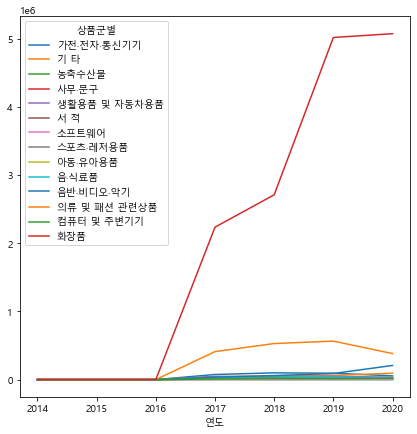

In [62]:
# 연도별 , 상품군별 판매액을 선그래프로 시각화하기

df_year_product.plot(figsize=(7,7))

<AxesSubplot:xlabel='연도'>

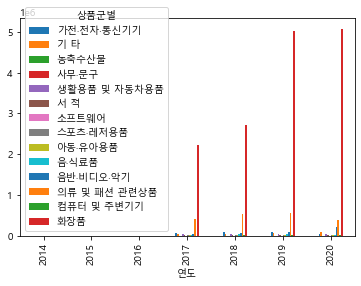

In [66]:
df_year_product.plot.bar()

In [67]:
# 연도별, 국가(대륙)별 판매액의 합을 구하는 피벗테이블 만들기
# df_year_country

df_year_country = df.pivot_table(index = '연도', columns='국가(대륙)별', values='million', aggfunc= 'sum')

<AxesSubplot:xlabel='연도'>

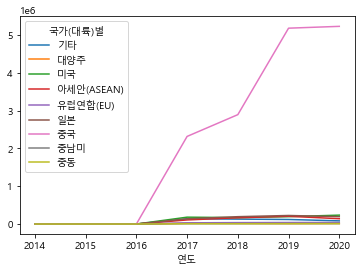

In [68]:
# 연도별 , 국가대륙별 판매액을 선그래프로 시가기화하기

df_year_country.plot()

<AxesSubplot:xlabel='연도'>

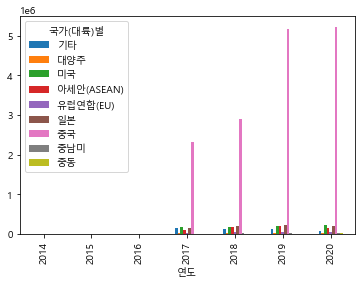

In [70]:
# 연도별 , 국가대륙별 판매액을 막대그래프로 시가기화하기

df_year_country.plot.bar()

###  중국의 정보를 따로 추출하여 상품군별 판매액 총합을 시각화해본다.

In [71]:
# 국가(대륙)별, 상품군별, 연도별 판매액의 총합을 구하는 피벗테이블 만들기
# df_country_product_year

df_country_product_year = df.pivot_table(index =['국가(대륙)별', '상품군별'] , columns='연도', values='million', aggfunc= 'sum')

In [72]:
df_country_product_year

연도                    2014  2015  2016    2017    2018    2019    2020
국가(대륙)별 상품군별                                                          
기타      가전·전자·통신기기     0.0   0.0   0.0  7371.0  3870.0  3684.0  3837.0
        기 타            0.0   0.0   0.0  3544.0  4020.0  2963.0  3345.0
        농축수산물          0.0   0.0   0.0     2.0     3.0     2.0     9.0
        사무·문구          0.0   0.0   0.0   126.0   120.0    95.0   187.0
        생활용품 및 자동차용품   0.0   0.0   0.0  2453.0  2227.0  1792.0  1462.0
...                    ...   ...   ...     ...     ...     ...     ...
중동      음·식료품          0.0   0.0   0.0    18.0    17.0    27.0   927.0
        음반·비디오·악기      0.0   0.0   0.0   398.0   784.0  1107.0  3250.0
        의류 및 패션 관련상품   0.0   0.0   0.0   772.0   879.0   924.0  1727.0
        컴퓨터 및 주변기기     0.0   0.0   0.0   544.0   250.0   335.0   388.0
        화장품            0.0   0.0   0.0  2333.0  2866.0  3399.0  2217.0

[126 rows x 7 columns]

In [74]:
# 국가(대륙)별, 상품군별, 연도별 판매액의 총합을 구하는 피벗테이블에서 중국만 추출하기
# df_china_product_year

df_china_product_year = df_country_product_year.loc['중국']

In [76]:
# df_china_product_year를 전치하기
# df_china_year_product

df_china_year_product = df_china_product_year.T

<AxesSubplot:xlabel='연도'>

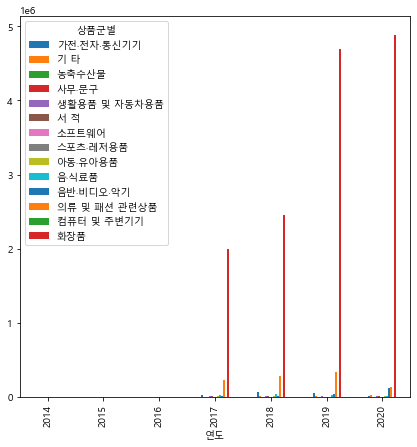

In [78]:
# 중국의 연도별, 상품군별 판매총액을 막대그래프로 시각화하기

df_china_year_product.plot.bar(figsize=(7,7))

### 화장품만 따로 추출하여 국가(대륙)별 판매액 총합을 시각화해본다

In [80]:
# 상품중 화장품만 선택해 df_cosmetic만들기

df_cosmetic = df.loc[df['상품군별'] == '화장품']
df_cosmetic

,국가(대륙)별,상품군별,판매유형별,기간,million,연도,분기
73,미국,화장품,면세점,2014 1/4,NaN,2014,1
74,미국,화장품,면세점 이외,2014 1/4,NaN,2014,1
118,중국,화장품,면세점,2014 1/4,NaN,2014,1
119,중국,화장품,면세점 이외,2014 1/4,NaN,2014,1
163,일본,화장품,면세점,2014 1/4,NaN,2014,1
...,...,...,...,...,...,...,...
12494,중남미,화장품,면세점 이외,2020 4/4 p),169.0,2020,4
12538,대양주,화장품,면세점,2020 4/4 p),1.0,2020,4
12539,대양주,화장품,면세점 이외,2020 4/4 p),467.0,2020,4
12583,기타,화장품,면세점,2020 4/4 p),6401.0,2020,4


In [83]:
# 화장품의 국가(대륙별) 판매액 총합을 구하기 

a = df_cosmetic.groupby('국가(대륙)별')['million'].sum()

<AxesSubplot:xlabel='국가(대륙)별'>

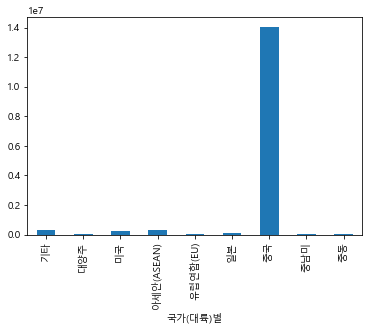

In [84]:
# 화장품의 국가대륙별 판매액 총합을 막대 그래프로 시각화하기

a.plot.bar()

### 중국의 화장품 정보만 추출해서 판매유형별 판매액 총합을 시각화해본다.

In [86]:
# 중국의 화장품 정보만 추출해 df_china_cosmetic 만들기

df_china_cosmetic = df.loc[(df['상품군별'] == '화장품') & (df['국가(대륙)별'] == '중국')]
df_china_cosmetic

,국가(대륙)별,상품군별,판매유형별,기간,million,연도,분기
118,중국,화장품,면세점,2014 1/4,NaN,2014,1
119,중국,화장품,면세점 이외,2014 1/4,NaN,2014,1
568,중국,화장품,면세점,2014 2/4,NaN,2014,2
569,중국,화장품,면세점 이외,2014 2/4,NaN,2014,2
1018,중국,화장품,면세점,2014 3/4,NaN,2014,3
1019,중국,화장품,면세점 이외,2014 3/4,NaN,2014,3
1468,중국,화장품,면세점,2014 4/4,NaN,2014,4
1469,중국,화장품,면세점 이외,2014 4/4,NaN,2014,4
1918,중국,화장품,면세점,2015 1/4,NaN,2015,1
1919,중국,화장품,면세점 이외,2015 1/4,NaN,2015,1


In [88]:
# 중국의 화장품의 판매유형별 판매액 총합 구하기
# df_china_cosmetic_type

df_china_cosmetic_type = df_china_cosmetic.groupby('판매유형별')['million'].sum()
df_china_cosmetic_type

판매유형별
면세점       13858037.0
면세점 이외      164991.0
Name: million, dtype: float64

<AxesSubplot:xlabel='판매유형별'>

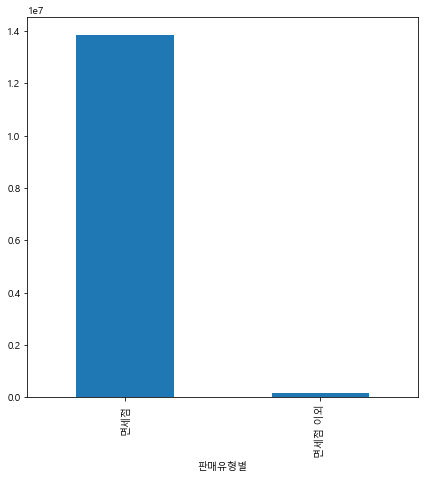

In [90]:
# # 중국의 화장품의 판매유형별 판매액 총합을 막대그래프로 시각화하기

df_china_cosmetic_type.plot.bar(figsize=(7,7))

### 화장품을 제외한 다른 상품들의 연도별, 국가(대륙)별  판매총액을 시각화해본다.

In [93]:
# 화장품을 제외한 다른 모든 상품들만 추출하여 df_not_cosmetic으로 만들기

df_not_cosmetic = df.loc[(df['상품군별'] != '화장품') ]
df_not_cosmetic


,국가(대륙)별,상품군별,판매유형별,기간,million,연도,분기
49,미국,컴퓨터 및 주변기기,면세점,2014 1/4,NaN,2014,1
50,미국,컴퓨터 및 주변기기,면세점 이외,2014 1/4,NaN,2014,1
52,미국,가전·전자·통신기기,면세점,2014 1/4,NaN,2014,1
53,미국,가전·전자·통신기기,면세점 이외,2014 1/4,NaN,2014,1
55,미국,소프트웨어,면세점,2014 1/4,NaN,2014,1
...,...,...,...,...,...,...,...
12593,기타,농축수산물,면세점 이외,2020 4/4 p),3.0,2020,4
12595,기타,생활용품 및 자동차용품,면세점,2020 4/4 p),0.0,2020,4
12596,기타,생활용품 및 자동차용품,면세점 이외,2020 4/4 p),391.0,2020,4
12598,기타,기 타,면세점,2020 4/4 p),0.0,2020,4


In [95]:
# 화장품을 제외한 상품들의 
# 연도별 상품군별 판매액 총액구하는 피벗테이블 만들기
# df_not_cosmetic_year_product

df_not_cosmetic_year_product = df_not_cosmetic.pivot_table(index='연도', columns='상품군별', values = 'million', aggfunc= 'sum')
df_not_cosmetic_year_product

상품군별,가전·전자·통신기기,기 타,농축수산물,사무·문구,생활용품 및 자동차용품,서 적,소프트웨어,스포츠·레저용품,아동·유아용품,음·식료품,음반·비디오·악기,의류 및 패션 관련상품,컴퓨터 및 주변기기
연도,,,,,,,,,,,,,
2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017,75141.0,44235.0,118.0,6115.0,47041.0,21524.0,614.0,16640.0,17819.0,31052.0,34859.0,410938.0,8829.0
2018,99226.0,54329.0,214.0,4341.0,41103.0,28351.0,1344.0,15265.0,19665.0,46052.0,59642.0,528786.0,17921.0
2019,93777.0,61683.0,126.0,5898.0,48706.0,24272.0,909.0,18490.0,19109.0,39711.0,89433.0,564606.0,15236.0
2020,54979.0,93794.0,150.0,5796.0,35532.0,27108.0,964.0,19951.0,17496.0,23568.0,207677.0,381734.0,19322.0


<AxesSubplot:xlabel='연도'>

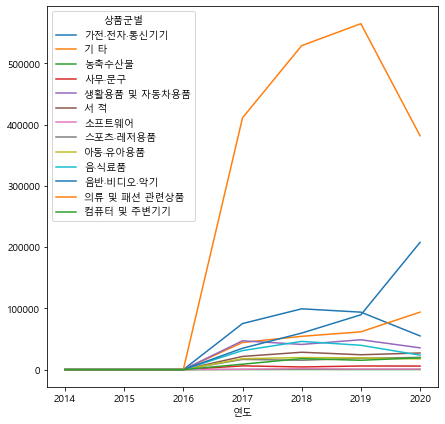

In [96]:
# 화장품을 제외한 상품들의 
# 연도별 상품군별 판매액 총액을 선그래프로 시각화하기

df_not_cosmetic_year_product.plot(figsize=(7,7))

<AxesSubplot:xlabel='연도'>

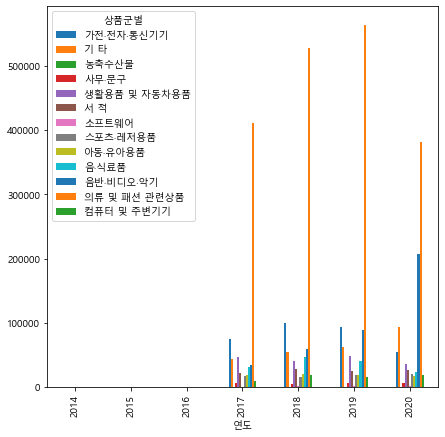

In [98]:
# 화장품을 제외한 상품들의 
# 연도별 상품군별 판매액 총액을 막대그래프로 시각화하기

df_not_cosmetic_year_product.plot.bar(figsize=(7,7))

In [102]:
# 화장품을 제외한 상품들의 
# 연도별 국가(대륙)별 판매액 총합을 구하는 피벗테이블 만들기

b = df_not_cosmetic.pivot_table(index='연도', columns='국가(대륙)별', values = 'million', aggfunc= 'sum')
b

국가(대륙)별,기타,대양주,미국,아세안(ASEAN),유럽연합(EU),일본,중국,중남미,중동
연도,,,,,,,,,
2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017,35943.0,14386.0,111953.0,68767.0,22077.0,121178.0,326529.0,8395.0,5697.0
2018,53533.0,13637.0,118912.0,75338.0,25761.0,175596.0,438720.0,9585.0,5157.0
2019,28131.0,9784.0,145393.0,84933.0,27303.0,182119.0,487840.0,10557.0,5896.0
2020,32007.0,13443.0,189255.0,104135.0,32160.0,159952.0,336326.0,11599.0,9194.0


<AxesSubplot:xlabel='연도'>

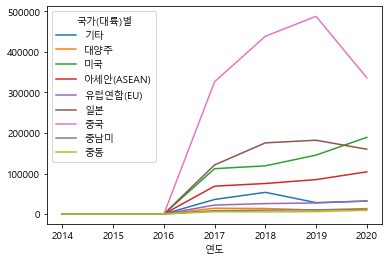

In [103]:
# 화장품을 제외한 상품들의 
# 연도별 국가(대륙)별 판매액 총합 선그래프로 시각화하기

b.plot()

<AxesSubplot:xlabel='연도'>

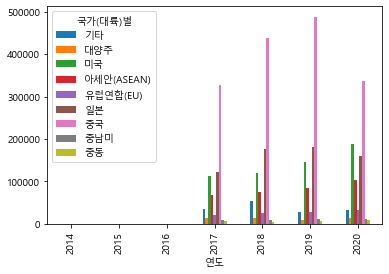

In [104]:
b.plot.bar()